In [19]:
# 1. Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score



In [20]:
# 2. Carregar e preparar os dados
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['target'] = california.target

In [21]:
# 3. Separar X e y
X = data.drop('target', axis=1)
y = data['target']

In [22]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# 4. Modelo 1: Regressão Linear Simples (usando apenas MedInc)
X_train_simple = X_train[['MedInc']]
X_test_simple = X_test[['MedInc']]

model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)
y_pred_simple = model_simple.predict(X_test_simple)

mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

In [24]:
print(f"[Simples] MSE: {mse_simple:.4f} | R²: {r2_simple:.4f}")

[Simples] MSE: 0.7091 | R²: 0.4589


In [25]:
# 5. Modelo 2: Regressão Linear Múltipla (todas as features)
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_test)

mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

In [26]:
print(f"[Múltipla] MSE: {mse_multi:.4f} | R²: {r2_multi:.4f}")

[Múltipla] MSE: 0.5559 | R²: 0.5758


In [27]:
# 6. Modelo 3: Regressão Ridge (com regularização)
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"[Ridge] MSE: {mse_ridge:.4f} | R²: {r2_ridge:.4f}")

[Ridge] MSE: 0.5558 | R²: 0.5759


In [28]:
# 7. Comparação final
print("\n" + "="*40)
print("RESUMO DOS MODELOS")
print("="*40)
print(f"{'Modelo':<15} {'MSE':<10} {'R²':<10}")
print(f"{'Simples':<15} {mse_simple:<10.4f} {r2_simple:<10.4f}")
print(f"{'Múltipla':<15} {mse_multi:<10.4f} {r2_multi:<10.4f}")
print(f"{'Ridge':<15} {mse_ridge:<10.4f} {r2_ridge:<10.4f}")


RESUMO DOS MODELOS
Modelo          MSE        R²        
Simples         0.7091     0.4589    
Múltipla        0.5559     0.5758    
Ridge           0.5558     0.5759    


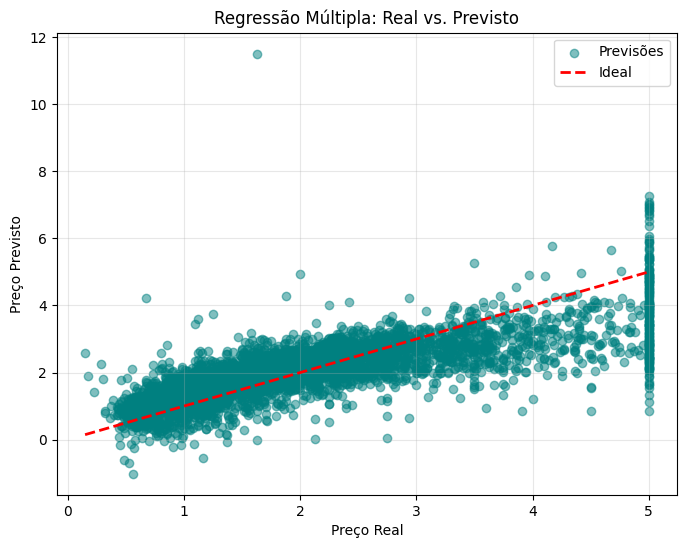

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_multi, alpha=0.5, color='teal', label='Previsões')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Ideal')
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('Regressão Múltipla: Real vs. Previsto')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

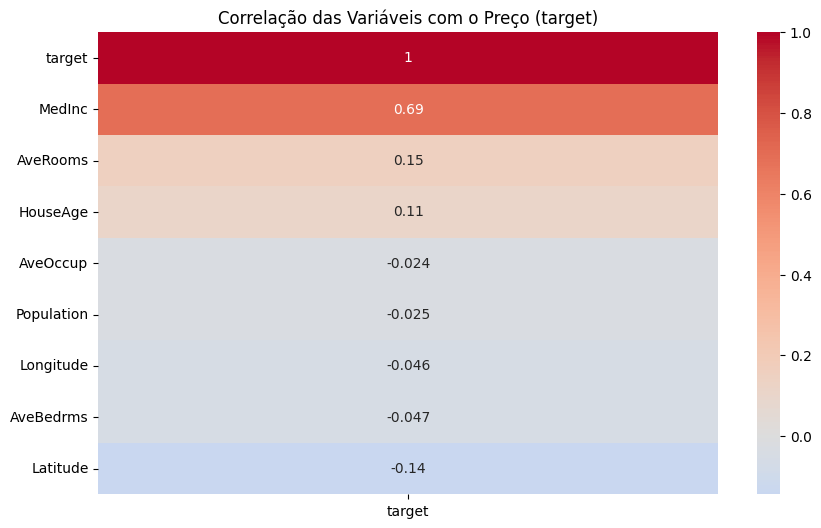

In [30]:
plt.figure(figsize=(10, 6))
correlation = data.corr()
sns.heatmap(correlation[['target']].sort_values('target', ascending=False),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlação das Variáveis com o Preço (target)')
plt.show()